In [2]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load data

In [3]:
df = pd.read_excel(r"C:\Users\USER\ِAI_Project\ML Projects\CLV Prediction & Segmentation\DataSet\Online Retail.xlsx")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Data cleaning

## Remove Cancelled orders

In [6]:
#remove cancelled orders (negative quantities, InvoiceNo starting with 'C')
#negative quantities
df = df[df['Quantity'] > 0]

#cancelled invoices
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

## Handel Missing Values

In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [8]:
# Handle missing CustomerIDs (approximately 135,000 records)
df = df.dropna()
df.shape

(397924, 8)

In [9]:
df.isna().sum().sum()

np.int64(0)

## Handel duplicate Values

In [10]:
print(df.duplicated().sum())

5192


In [11]:
df.drop_duplicates(inplace=True)

## Handel Outliers

In [12]:
df.shape

(392732, 8)

In [13]:
df.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99, .999])

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392732.000000,392732,392732.000000,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
1%,1.000000,2010-12-03 10:26:00,0.210000,12415.000000
5%,1.000000,2010-12-14 15:43:00,0.420000,12626.000000
10%,1.000000,2011-01-21 15:57:00,0.550000,12876.000000
20%,2.000000,2011-03-16 12:26:00,0.850000,13536.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
90%,24.000000,2011-11-20 15:36:00,6.350000,17719.000000
95%,36.000000,2011-11-29 15:23:00,8.500000,17905.000000


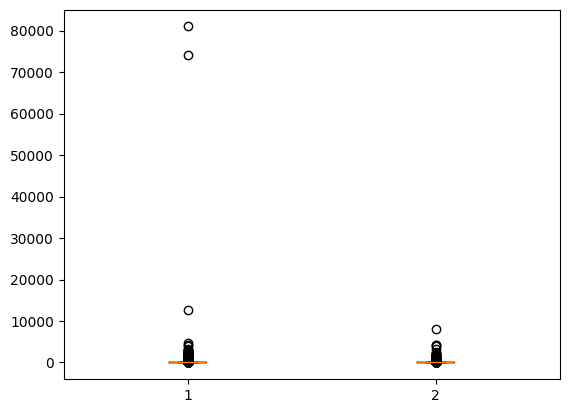

In [14]:
plt.boxplot(df[["Quantity", "UnitPrice"]])
plt.show()

In [15]:
outliers = df[(df['Quantity'] > 500) | (df['UnitPrice'] > 50)]
outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
246,536392,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2010-12-01 10:29:00,165.00,13705.0,United Kingdom
730,536437,17021,NAMASTE SWAGAT INCENSE,600,2010-12-01 12:12:00,0.24,13694.0,United Kingdom
3790,536676,21769,VINTAGE POST OFFICE CABINET,1,2010-12-02 12:18:00,79.95,16752.0,United Kingdom
3917,536736,22616,PACK OF 12 LONDON TISSUES,600,2010-12-02 12:59:00,0.29,17381.0,United Kingdom
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
537883,581375,21137,BLACK RECORD COVER FRAME,960,2011-12-08 12:36:00,3.39,16210.0,United Kingdom
540061,581457,23543,WALL ART KEEP CALM,698,2011-12-08 18:43:00,4.15,18102.0,United Kingdom
540070,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949.0,United Kingdom
540071,581459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0.72,17949.0,United Kingdom


In [16]:
df = df.drop(outliers.index)
df.reset_index(inplace=True, drop=True)

In [17]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392084.000000,392084,392084.000000,392084.000000
mean,11.790606,2011-07-10 20:08:07.487527936,2.887614,15287.481075
min,1.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:16:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:57:00,3.750000,16791.000000
max,500.000000,2011-12-09 12:50:00,50.000000,18287.000000
std,25.805418,NaN,3.214718,1713.272719


# Feature Selection and Engineering

## Create Feature

In [18]:
#Calculate Customer Lifetime Value: Total spending per customer (Quantity × UnitPrice)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392084 entries, 0 to 392083
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392084 non-null  object        
 1   StockCode    392084 non-null  object        
 2   Description  392084 non-null  object        
 3   Quantity     392084 non-null  int64         
 4   InvoiceDate  392084 non-null  datetime64[ns]
 5   UnitPrice    392084 non-null  float64       
 6   CustomerID   392084 non-null  float64       
 7   Country      392084 non-null  object        
 8   TotalPrice   392084 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 26.9+ MB


*  #### Engineer temporal features: hour of day, day of week, month, season from InvoiceDate

In [20]:
df['Hour'] = df['InvoiceDate'].dt.hour
df['Day of Week'] = df['InvoiceDate'].dt.dayofweek
df['Month'] = df['InvoiceDate'].dt.month

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Hour,Day of Week,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...
392079,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12,4,12
392080,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,4,12
392081,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,4,12
392082,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,4,12


In [21]:
def get_season(month):
    if month in [12,1,2]: return 'Winter'
    elif month in [3,4,5]: return 'Spring'
    elif month in [6,7,8]: return 'Summer'
    else: return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

## RMF data

In [22]:
# Recency: days since last purchase
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (reference_date - recency['InvoiceDate']).dt.days
recency = recency[['CustomerID', 'Recency']]

In [23]:
#Frequency: Total number of transactions per customer
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)



In [24]:
#Monetary: Total spending amount per customer
monetary = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)

In [25]:
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

In [26]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,7,4310.00
1,12348.0,75,4,1797.24
2,12349.0,19,1,1457.55
3,12350.0,310,1,334.40
4,12352.0,36,7,1665.74


In [27]:
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])

rfm["FrequencyScore"] = pd.qcut(rfm["Frequency"].rank(method="first"),
                                5, labels=[1, 2, 3, 4, 5])

rfm["MonetaryScore"] = pd.qcut( rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])


In [28]:
rfm["CLV"] = (
    0.3 * rfm["RecencyScore"].astype(int) +
    0.4 * rfm["FrequencyScore"].astype(int) +
    0.3 * rfm["MonetaryScore"].astype(int)
)

In [29]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,CLV
0,12347.0,2,7,4310.00,5,5,5,5.0
1,12348.0,75,4,1797.24,2,4,4,3.4
2,12349.0,19,1,1457.55,4,1,4,2.8
3,12350.0,310,1,334.40,1,1,2,1.3
4,12352.0,36,7,1665.74,3,5,4,4.1


# Data Transformation

## Normalize numerical features

###  RFM

In [30]:
scaler_rfm = MinMaxScaler()

In [31]:
rfm_final = rfm.copy()

In [32]:
rfm_final.drop(['CustomerID','RecencyScore', 'FrequencyScore', 'MonetaryScore'], axis=1, inplace=True)

In [33]:
rfm_final.head()

,Recency,Frequency,Monetary,CLV
0,2,7,4310.00,5.0
1,75,4,1797.24,3.4
2,19,1,1457.55,2.8
3,310,1,334.40,1.3
4,36,7,1665.74,4.1


In [34]:
target = rfm_final['CLV']
features = rfm_final.drop('CLV', axis=1)
Matrix_features = scaler_rfm.fit_transform(features)

features_new = pd.DataFrame(Matrix_features, columns=features.columns)
rfm_std = pd.concat([features_new, target], axis=1)
rfm_std.head()

,Recency,Frequency,Monetary,CLV
0,0.002681,0.028986,0.016241,5.0
1,0.198391,0.014493,0.006766,3.4
2,0.048257,0.000000,0.005485,2.8
3,0.828418,0.000000,0.001250,1.3
4,0.093834,0.028986,0.006270,4.1


In [35]:
joblib.dump(scaler_rfm, 'scaler_rfm.pkl')

['scaler_rfm.pkl']

# `Final data`

## Data

In [36]:
df.reset_index(drop=True, inplace=True)
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Hour,Day of Week,Month,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,2,12,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12,Winter


In [37]:
df.to_csv('data.csv', index=False)

## rfm

In [38]:
rfm_new = rfm.copy()
rfm_new.drop(['RecencyScore','FrequencyScore', 'MonetaryScore'], axis=1, inplace=True)
rfm_new.reset_index(drop=True, inplace=True)
rfm_new.head()

,CustomerID,Recency,Frequency,Monetary,CLV
0,12347.0,2,7,4310.00,5.0
1,12348.0,75,4,1797.24,3.4
2,12349.0,19,1,1457.55,2.8
3,12350.0,310,1,334.40,1.3
4,12352.0,36,7,1665.74,4.1


In [39]:
rfm_new.to_csv('RFM.csv', index=False)

## rfm_std

In [40]:
rfm_std.reset_index(drop=True, inplace=True)
rfm_std.head()

,Recency,Frequency,Monetary,CLV
0,0.002681,0.028986,0.016241,5.0
1,0.198391,0.014493,0.006766,3.4
2,0.048257,0.000000,0.005485,2.8
3,0.828418,0.000000,0.001250,1.3
4,0.093834,0.028986,0.006270,4.1


In [41]:
rfm_std.to_csv('rfm_std.csv', index=False)